In [1]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
import numpy as np
import sys
from IPython.display import clear_output
%matplotlib inline

In [2]:
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])
train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [3]:
X, y = next(iter(train_loader))
X = X.numpy()
y = y.numpy()

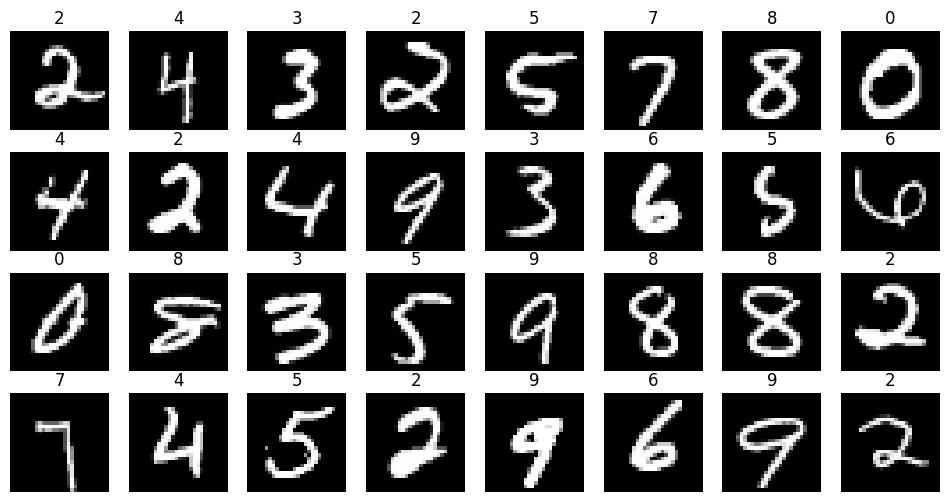

In [4]:
plt.figure(figsize=(12, 6))
for i in range(len(X)):
    plt.subplot(4, 8, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.title(y[i])
    plt.axis('off')

In [5]:
def train(network, epochs, learning_rate, plot=True,
          verbose=True, loss=None):
    loss = loss or NLLLoss()
    train_loss_epochs = []
    test_loss_epochs = []
    train_accuracy_epochs = []
    test_accuracy_epochs = []
    try:
        for epoch in range(epochs):
            losses = []
            accuracies = []
            for X, y in train_loader:
                X = X.view(X.shape[0], -1).numpy()
                y = y.numpy()
                prediction = network.forward(X)
                loss_batch = loss.forward(prediction, y)
                losses.append(loss_batch)
                dLdx = loss.backward()
                network.backward(dLdx)
                network.step(learning_rate)
                accuracies.append((np.argmax(prediction, 1)==y).mean())
            train_loss_epochs.append(np.mean(losses))
            train_accuracy_epochs.append(np.mean(accuracies))
            losses = []
            accuracies = []
            for X, y in test_loader:
                X = X.view(X.shape[0], -1).numpy()
                y = y.numpy()
                prediction = network.forward(X)
                loss_batch = loss.forward(prediction, y)
                losses.append(loss_batch)
                accuracies.append((np.argmax(prediction, 1)==y).mean())
            test_loss_epochs.append(np.mean(losses))
            test_accuracy_epochs.append(np.mean(accuracies))
            clear_output(True)
            if verbose:
                sys.stdout.write('\rEpoch {0}... (Train/Test) NLL: {1:.3f}/{2:.3f}\tAccuracy: {3:.3f}/{4:.3f}'.format(
                            epoch, train_loss_epochs[-1], test_loss_epochs[-1],
                            train_accuracy_epochs[-1], test_accuracy_epochs[-1]))
            if plot:
                plt.figure(figsize=(12, 5))
                plt.subplot(1, 2, 1)
                plt.plot(train_loss_epochs, label='Train')
                plt.plot(test_loss_epochs, label='Test')
                plt.xlabel('Epochs', fontsize=16)
                plt.ylabel('Loss', fontsize=16)
                plt.legend(loc=0, fontsize=16)
                plt.grid('on')
                plt.subplot(1, 2, 2)
                plt.plot(train_accuracy_epochs, label='Train accuracy')
                plt.plot(test_accuracy_epochs, label='Test accuracy')
                plt.xlabel('Epochs', fontsize=16)
                plt.ylabel('Accuracy', fontsize=16)
                plt.legend(loc=0, fontsize=16)
                plt.grid('on')
                plt.show()
    except KeyboardInterrupt:
        pass
    return train_loss_epochs, \
           test_loss_epochs, \
           train_accuracy_epochs, \
           test_accuracy_epochs

In [6]:
from layers import *
from network import NLLLoss, NeuralNetwork

In [7]:
network = NeuralNetwork([
    Linear(784, 100), Tanh(), 
    Linear(100, 100), Tanh(),
    Linear(100, 10)
])
loss = NLLLoss()

Epoch 19... (Train/Test) NLL: 0.031/0.079	Accuracy: 0.993/0.975

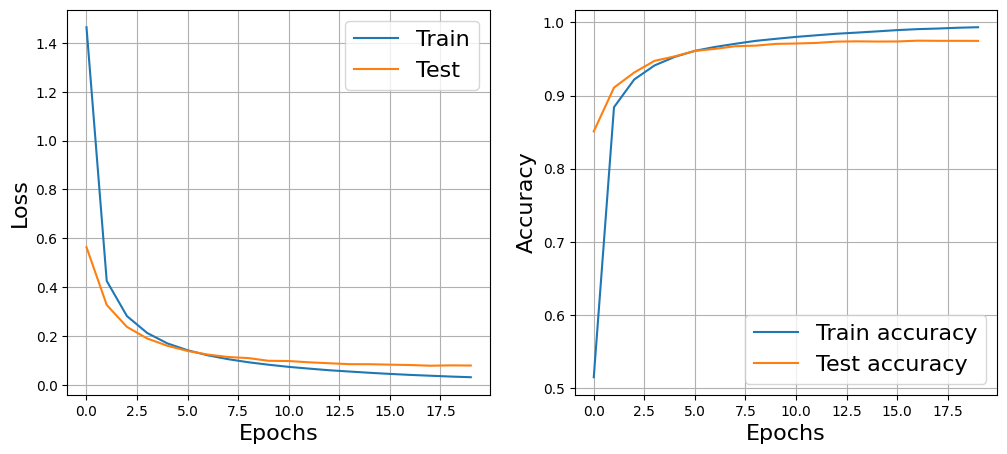

In [8]:
tr_t, ts_t, tr_ac_t, ts_ac_t = train(network, 20, 0.01)

Epoch 19... (Train/Test) NLL: 0.036/0.079	Accuracy: 0.990/0.978

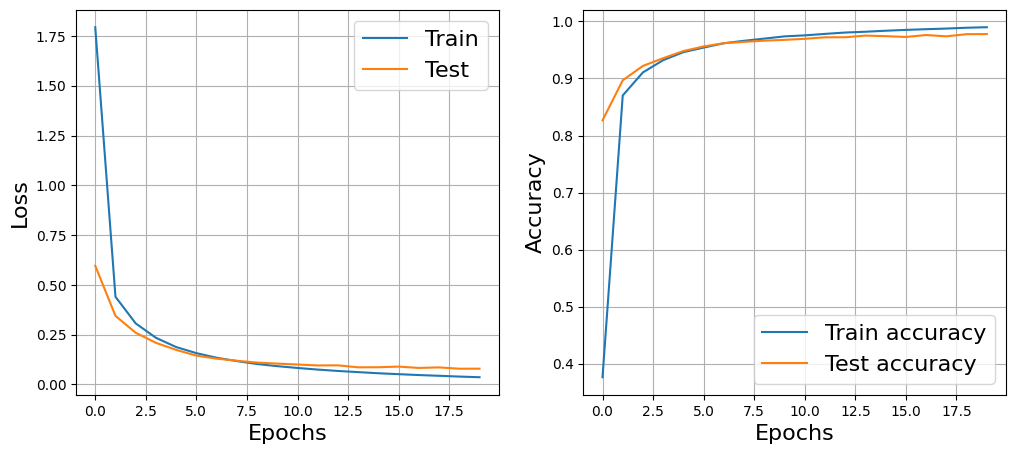

In [9]:
network = NeuralNetwork([
    Linear(784, 100), ReLU(),
    Linear(100, 100), ReLU(),
    Linear(100, 10)
])
loss = NLLLoss()
tr_r, ts_r, tr_ac_r, ts_ac_r = train(network, 20, 0.01, plot=True, verbose=True)

Epoch 19... (Train/Test) NLL: 0.046/0.081	Accuracy: 0.987/0.974

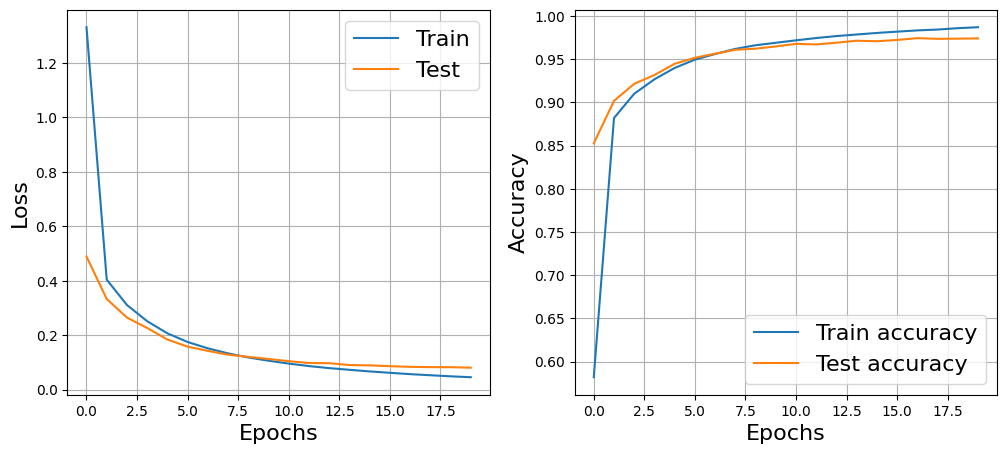

In [10]:
network = NeuralNetwork([
    Linear(784, 100), ELU(),
    Linear(100, 100), ELU(),
    Linear(100, 10)
])
loss = NLLLoss()
tr_e, ts_e, tr_ac_e, ts_ac_e = train(network, 20, 0.01, plot=True, verbose=True)

Epoch 19... (Train/Test) NLL: 0.300/0.297	Accuracy: 0.921/0.923

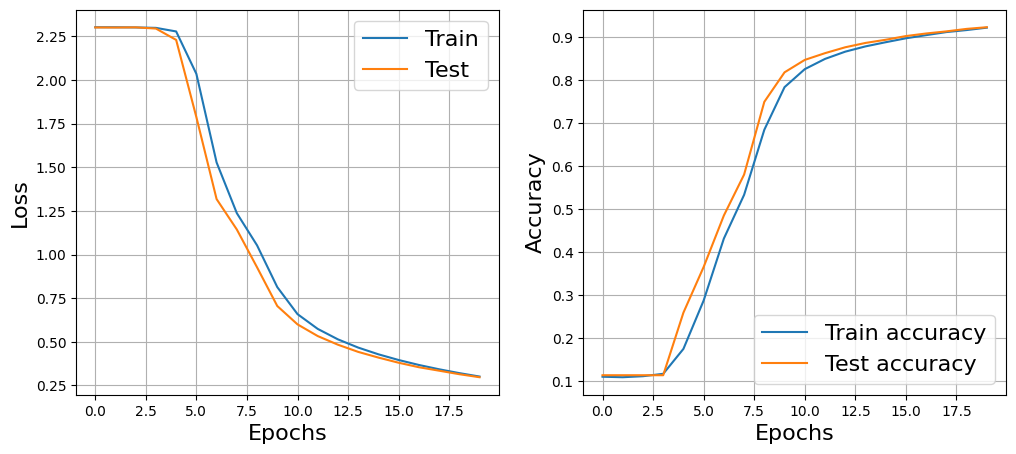

In [11]:
network = NeuralNetwork([
    Linear(784, 100), Sigmoid(),
    Linear(100, 100), Sigmoid(),
    Linear(100, 10)
])
loss = NLLLoss()
tr_s, ts_s, tr_ac_s, ts_ac_s = train(network, 20, 0.01, plot=True, verbose=True)

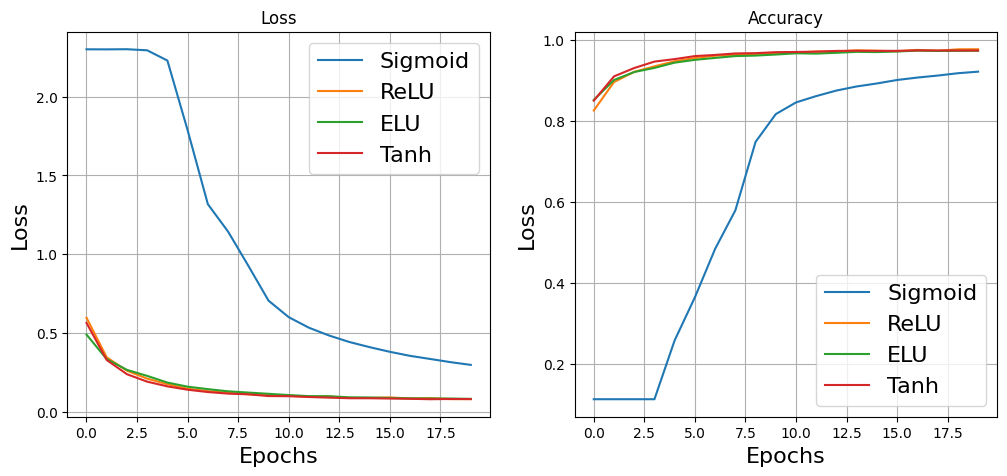

In [12]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(ts_s, label='Sigmoid')
plt.plot(ts_r, label='ReLU')
plt.plot(ts_e, label='ELU')
plt.plot(ts_t, label='Tanh')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(loc=0, fontsize=16)
plt.grid()
plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(ts_ac_s, label='Sigmoid')
plt.plot(ts_ac_r, label='ReLU')
plt.plot(ts_ac_e, label='ELU')
plt.plot(ts_ac_t, label='Tanh')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(loc=0, fontsize=16)
plt.grid()
plt.show()

In [13]:
from augmentation import get_train_transform, get_test_transform

In [14]:
train_transform_rot = get_train_transform(augmentations=['rotation'])
train_dataset_rot = MNIST('.', train=True, download=True, transform=train_transform_rot)

train_transform_shift = get_train_transform(augmentations=['shift'])
train_dataset_shift = MNIST('.', train=True, download=True, transform=train_transform_shift)

train_transform_noise = get_train_transform(augmentations=['noise'])
train_dataset_noise = MNIST('.', train=True, download=True, transform=train_transform_noise)

train_transform_all = get_train_transform(augmentations=['rotation', 'shift', 'noise'])
train_dataset_all = MNIST('.', train=True, download=True, transform=train_transform_all)

test_dataset = MNIST('.', train=False, transform=get_test_transform())

In [15]:
train_loader_rot = DataLoader(train_dataset_rot, batch_size=32, shuffle=True)
train_loader_shift = DataLoader(train_dataset_shift, batch_size=32, shuffle=True)
train_loader_noise = DataLoader(train_dataset_noise, batch_size=32, shuffle=True)
train_loader_all = DataLoader(train_dataset_all, batch_size=32, shuffle=True)

test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

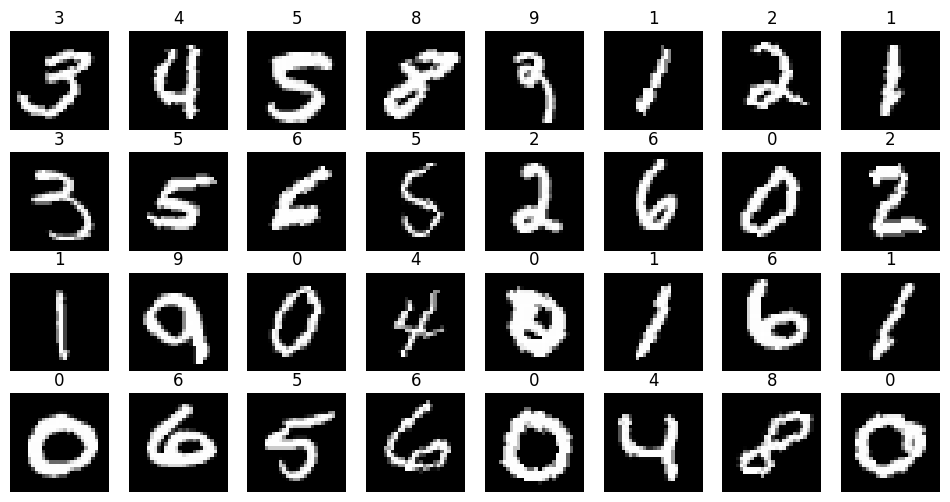

In [16]:
X_rot, y_rot = next(iter(train_loader_rot))
X_rot = X_rot.numpy()
y_rot = y_rot.numpy()
plt.figure(figsize=(12, 6))
for i in range(len(X_rot)):
    plt.subplot(4, 8, i+1)
    plt.imshow(X_rot[i].reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.title(y_rot[i])
    plt.axis('off')

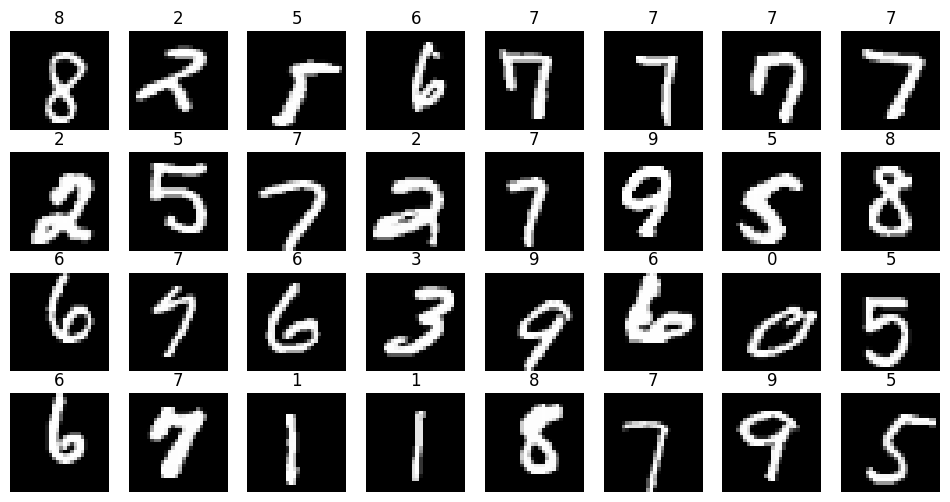

In [17]:
X_shift, y_shift = next(iter(train_loader_shift))
X_shift = X_shift.numpy()
y_shift = y_shift.numpy()
plt.figure(figsize=(12, 6))
for i in range(len(X_shift)):
    plt.subplot(4, 8, i+1)
    plt.imshow(X_shift[i].reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.title(y_shift[i])
    plt.axis('off')

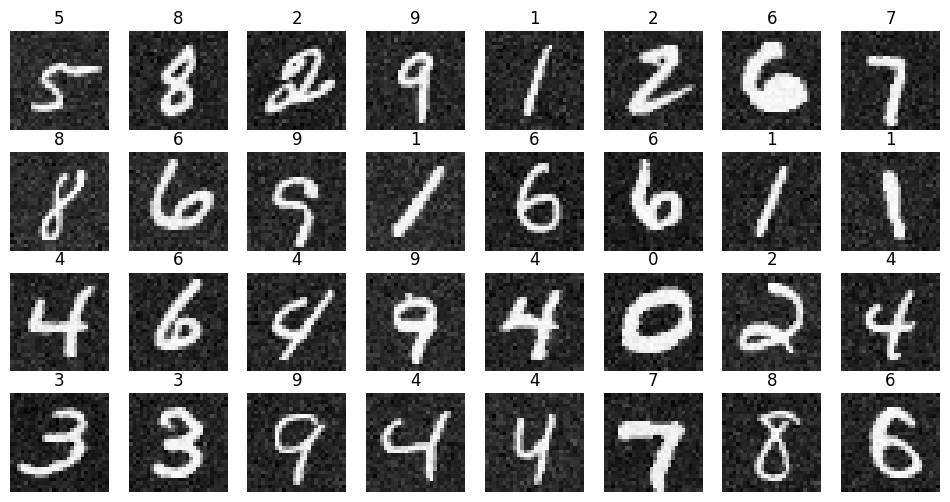

In [18]:
X_noise, y_noise = next(iter(train_loader_noise))
X_noise = X_noise.numpy()
y_noise = y_noise.numpy()
plt.figure(figsize=(12, 6))
for i in range(len(X_shift)):
    plt.subplot(4, 8, i+1)
    plt.imshow(X_noise[i].reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.title(y_noise[i])
    plt.axis('off')

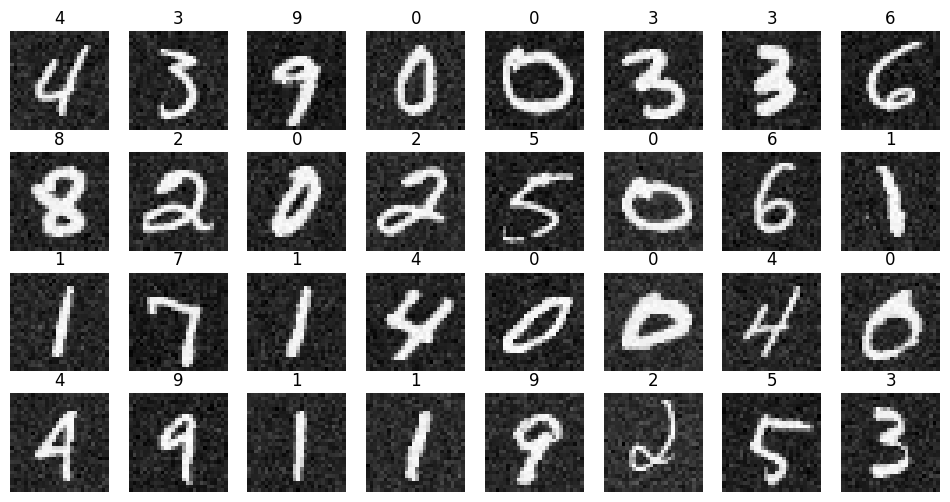

In [19]:
X_all, y_all = next(iter(train_loader_noise))
X_all = X_all.numpy()
y_all = y_all.numpy()
plt.figure(figsize=(12, 6))
for i in range(len(X_shift)):
    plt.subplot(4, 8, i+1)
    plt.imshow(X_all[i].reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.title(y_all[i])
    plt.axis('off')

In [20]:
def my_train(network, train_loader, test_loader, epochs, learning_rate, plot=True,
          verbose=True, loss=None):
    loss_fn = loss or NLLLoss()
    train_loss_epochs = []
    test_loss_epochs = []
    train_accuracy_epochs = []
    test_accuracy_epochs = []
    try:
        for epoch in range(epochs):
            train_losses = []
            train_accuracies = []
            for X_batch, y_batch in train_loader:
                X_flat = X_batch.view(X_batch.shape[0], -1).numpy()  # (N, 784)
                y_np = y_batch.numpy()
                pred = network.forward(X_flat)
                loss_val = loss_fn.forward(pred, y_np)
                train_losses.append(loss_val)
                dLdy = loss_fn.backward()
                network.backward(dLdy)
                network.step(learning_rate)
                predicted_labels = np.argmax(pred, axis=1)
                acc = np.mean(predicted_labels == y_np)
                train_accuracies.append(acc)
            avg_train_loss = np.mean(train_losses)
            avg_train_acc = np.mean(train_accuracies)
            test_losses = []
            test_accuracies = []
            for X_batch, y_batch in test_loader:
                X_flat = X_batch.view(X_batch.shape[0], -1).numpy()
                y_np = y_batch.numpy()
                pred = network.forward(X_flat)
                loss_val = loss_fn.forward(pred, y_np)
                test_losses.append(loss_val)
                predicted_labels = np.argmax(pred, axis=1)
                acc = np.mean(predicted_labels == y_np)
                test_accuracies.append(acc)
            avg_test_loss = np.mean(test_losses)
            avg_test_acc = np.mean(test_accuracies)
            train_loss_epochs.append(avg_train_loss)
            test_loss_epochs.append(avg_test_loss)
            train_accuracy_epochs.append(avg_train_acc)
            test_accuracy_epochs.append(avg_test_acc)
            clear_output(wait=True)
            if verbose:
                print(f'\rEpoch {epoch+1}/{epochs}... '
                      f'(Train/Test) Loss: {avg_train_loss:.4f}/{avg_test_loss:.4f} | '
                      f'Accuracy: {avg_train_acc:.4f}/{avg_test_acc:.4f}', end='', flush=True)
            if plot:
                plt.figure(figsize=(14, 5))
                plt.subplot(1, 2, 1)
                plt.plot(range(1, epoch+2), train_loss_epochs, label='Train Loss', marker='o')
                plt.plot(range(1, epoch+2), test_loss_epochs, label='Test Loss', marker='s')
                plt.title('Loss', fontsize=16)
                plt.xlabel('Epoch', fontsize=14)
                plt.ylabel('NLL Loss', fontsize=14)
                plt.legend(fontsize=14)
                plt.grid(True, linestyle='--', alpha=0.7)
                plt.subplot(1, 2, 2)
                plt.plot(range(1, epoch+2), train_accuracy_epochs, label='Train Accuracy', marker='o')
                plt.plot(range(1, epoch+2), test_accuracy_epochs, label='Test Accuracy', marker='s')
                plt.title('Accuracy', fontsize=16)
                plt.xlabel('Epoch', fontsize=14)
                plt.ylabel('Accuracy', fontsize=14)
                plt.legend(fontsize=14)
                plt.grid(True, linestyle='--', alpha=0.7)
                plt.tight_layout()
                plt.show()
    except KeyboardInterrupt:
        pass
    return train_loss_epochs, test_loss_epochs, train_accuracy_epochs, test_accuracy_epochs

Epoch 20/20... (Train/Test) Loss: 0.0694/0.0658 | Accuracy: 0.9789/0.9803

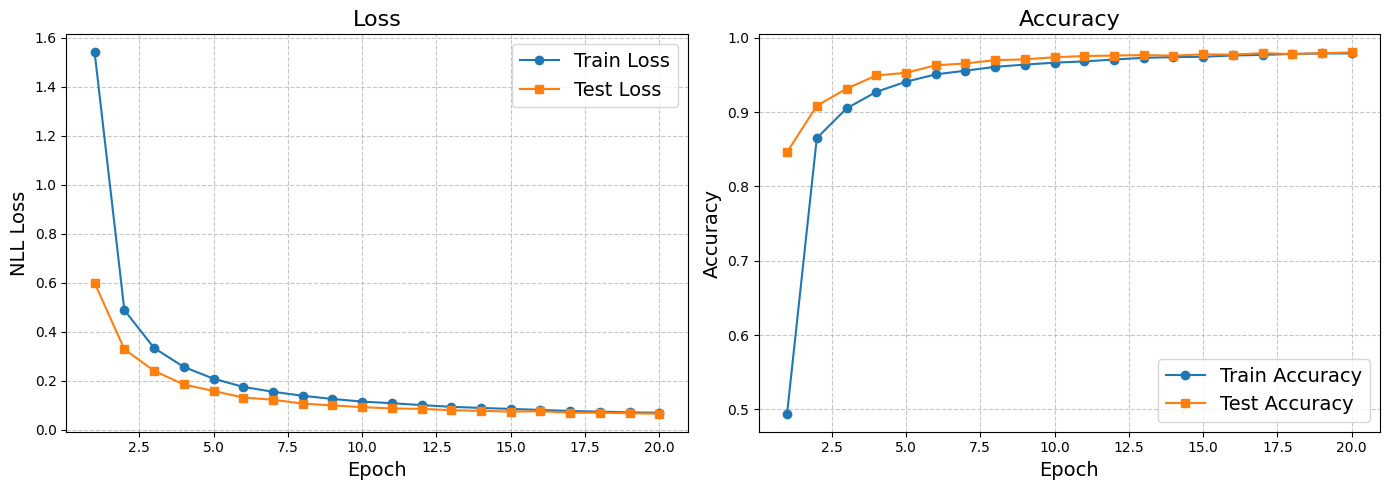

In [21]:
network = NeuralNetwork([
    Linear(784, 100), Tanh(),
    Linear(100, 100), Tanh(),
    Linear(100, 10)
])
loss = NLLLoss()
tr_rot, ts_rot, tr_ac_rot, ts_ac_rot = my_train(network, train_loader_rot, test_loader, 20, 0.01, plot=True, verbose=True)

Epoch 20/20... (Train/Test) Loss: 0.1014/0.0725 | Accuracy: 0.9691/0.9767

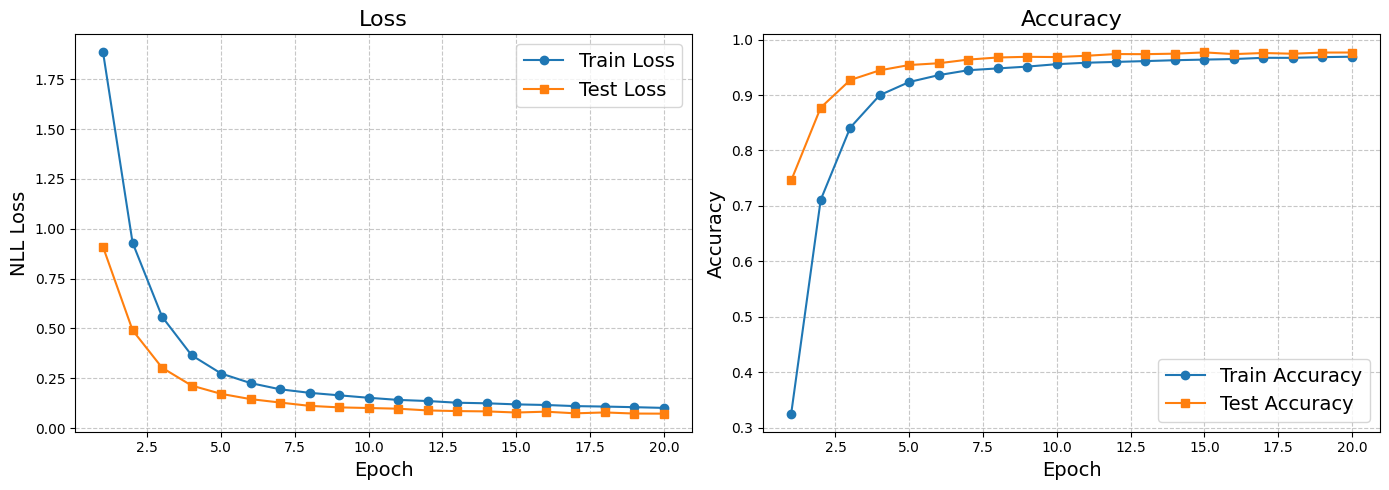

In [22]:
network = NeuralNetwork([
    Linear(784, 100), Tanh(),
    Linear(100, 100), Tanh(),
    Linear(100, 10)
])
loss = NLLLoss()
tr_shift, ts_shift, tr_ac_shift, ts_ac_shift = my_train(network, train_loader_shift, test_loader, 20, 0.01, plot=True, verbose=True)

Epoch 20/20... (Train/Test) Loss: 0.0331/0.0748 | Accuracy: 0.9922/0.9771

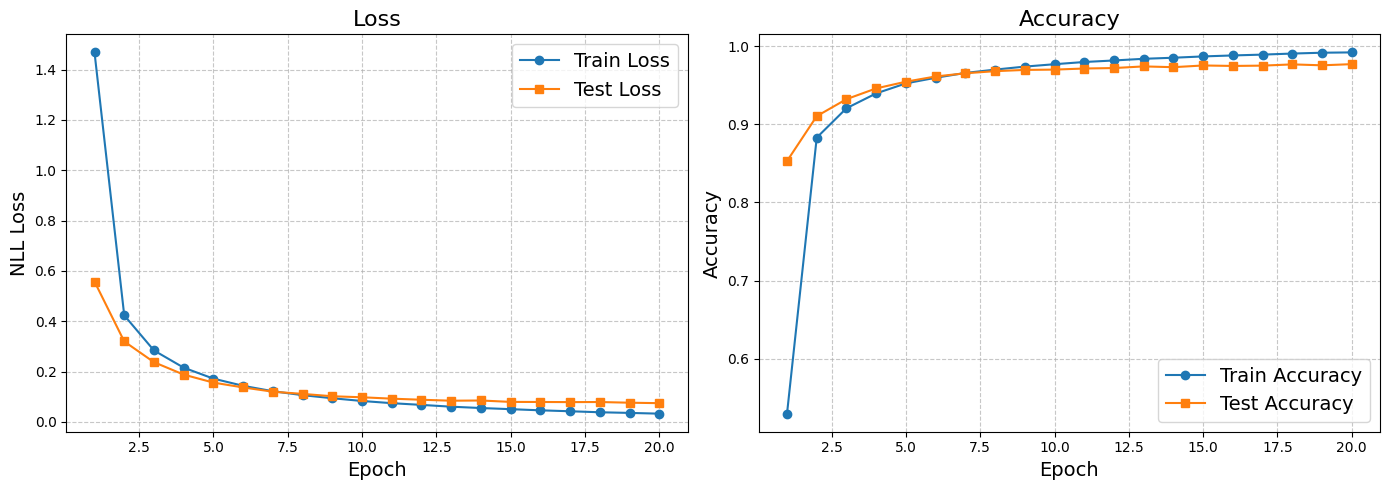

In [23]:
network = NeuralNetwork([
    Linear(784, 100), Tanh(),
    Linear(100, 100), Tanh(),
    Linear(100, 10)
])
loss = NLLLoss()
tr_noise, ts_noise, tr_ac_noise, ts_ac_noise = my_train(network, train_loader_noise, test_loader, 20, 0.01, plot=True, verbose=True)

Epoch 20/20... (Train/Test) Loss: 0.1399/0.0696 | Accuracy: 0.9570/0.9790

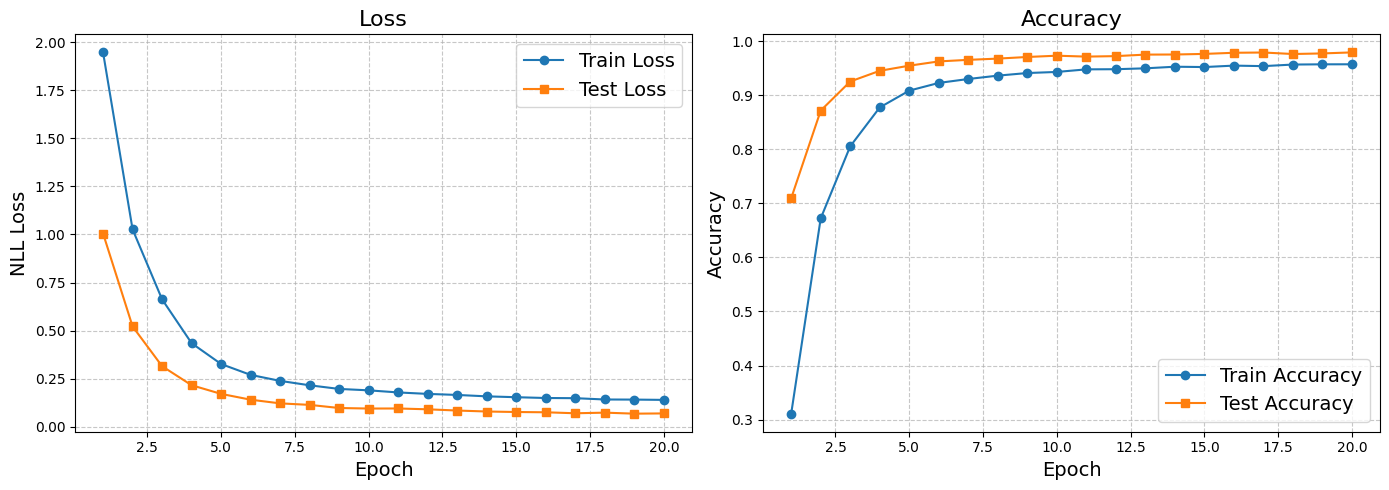

In [24]:
network = NeuralNetwork([
    Linear(784, 100), Tanh(),
    Linear(100, 100), Tanh(),
    Linear(100, 10)
])
loss = NLLLoss()
tr_all, ts_all, tr_ac_all, ts_ac_all = my_train(network, train_loader_all, test_loader, 20, 0.01, plot=True, verbose=True)

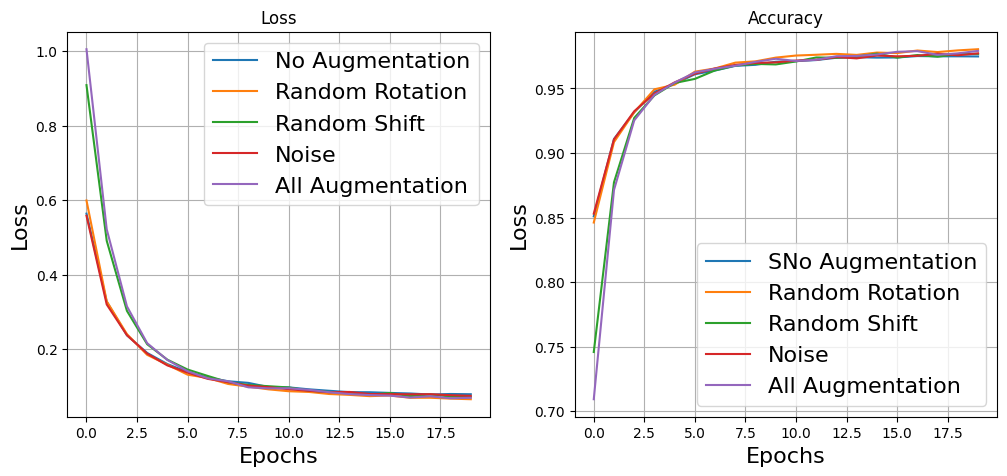

In [25]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(ts_t, label='No Augmentation')
plt.plot(ts_rot, label='Random Rotation')
plt.plot(ts_shift, label='Random Shift')
plt.plot(ts_noise, label='Noise')
plt.plot(ts_all, label='All Augmentation')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(loc=0, fontsize=16)
plt.grid()
plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(ts_ac_t, label='SNo Augmentation')
plt.plot(ts_ac_rot, label='Random Rotation')
plt.plot(ts_ac_shift, label='Random Shift')
plt.plot(ts_ac_noise, label='Noise')
plt.plot(ts_ac_all, label='All Augmentation')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(loc=0, fontsize=16)
plt.grid()
plt.show()

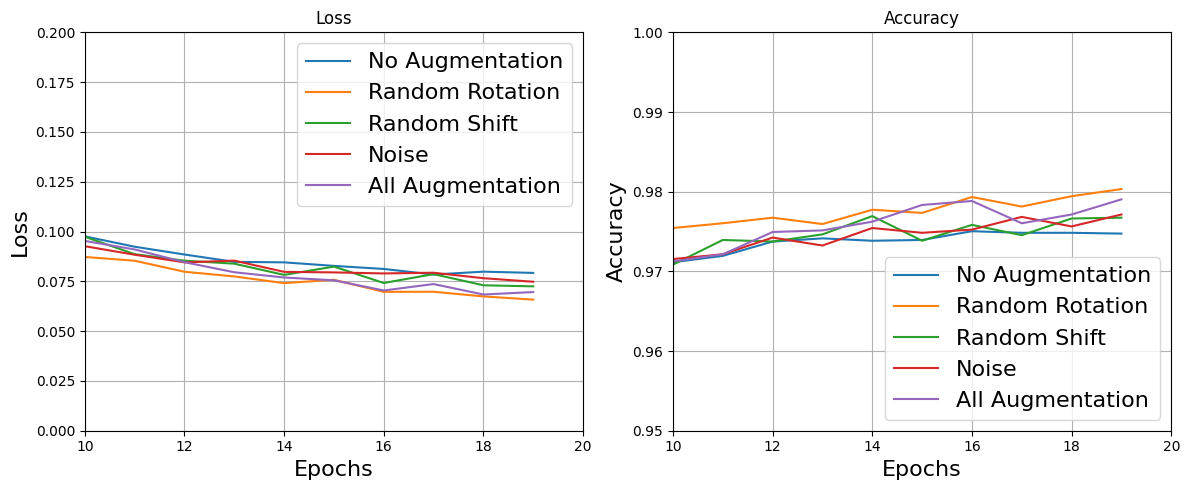

In [26]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(ts_t, label='No Augmentation')
plt.plot(ts_rot, label='Random Rotation')
plt.plot(ts_shift, label='Random Shift')
plt.plot(ts_noise, label='Noise')
plt.plot(ts_all, label='All Augmentation')
plt.title('Loss')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(loc=0, fontsize=16)
plt.grid(True)
plt.xlim(10, 20)
plt.ylim(0, 0.2)
plt.subplot(1, 2, 2)
plt.plot(ts_ac_t, label='No Augmentation')
plt.plot(ts_ac_rot, label='Random Rotation')
plt.plot(ts_ac_shift, label='Random Shift')
plt.plot(ts_ac_noise, label='Noise')
plt.plot(ts_ac_all, label='All Augmentation')
plt.title('Accuracy')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(loc=0, fontsize=16)
plt.grid(True)
plt.xlim(10, 20)
plt.ylim(0.95, 1.0)
plt.tight_layout()
plt.show()